In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

# Exercises
Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

## Use the iris database to answer the following quesitons:

In [2]:
iris = sns.load_dataset('iris')

In [3]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

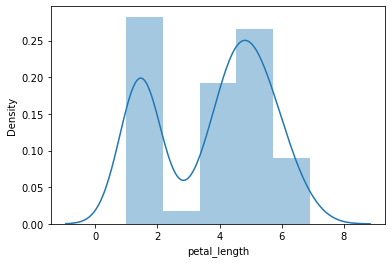

In [5]:
#I.1: What does the distribution of petal lengths look like?

sns.distplot(iris.petal_length)

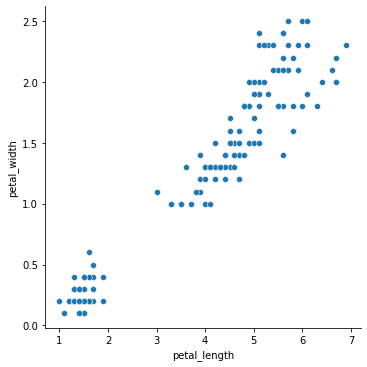

In [6]:
#I.2: Is there a correlation between petal length and petal width?

sns.relplot(data = iris, x = 'petal_length', y = 'petal_width')

#Yes, a positive correlation

In [13]:
#iris.head()
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

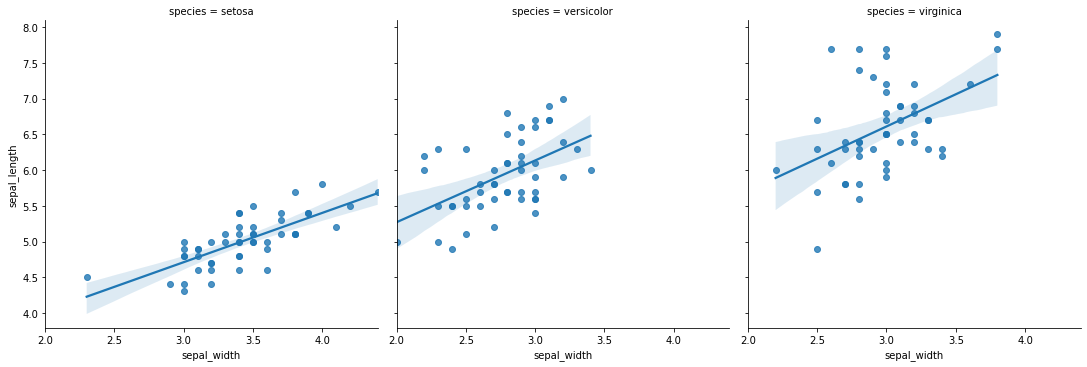

In [12]:
#I.3: Would it be reasonable to predict species based on sepal width and sepal length?

sns.lmplot(x = 'sepal_width', 
           y = 'sepal_length', 
           col = 'species', 
           data = iris)

# only for species: sestosa, 
#the other two have a lower correlation coefficient

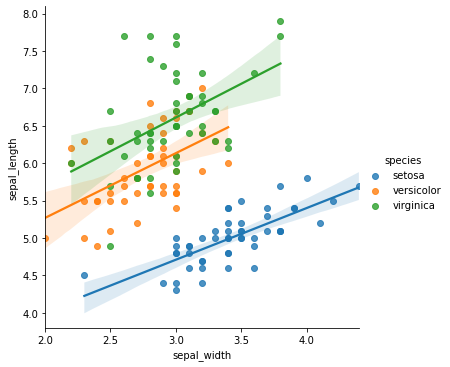

In [119]:
sns.lmplot(x = 'sepal_width', 
           y = 'sepal_length', 
           hue = 'species', 
           data = iris)


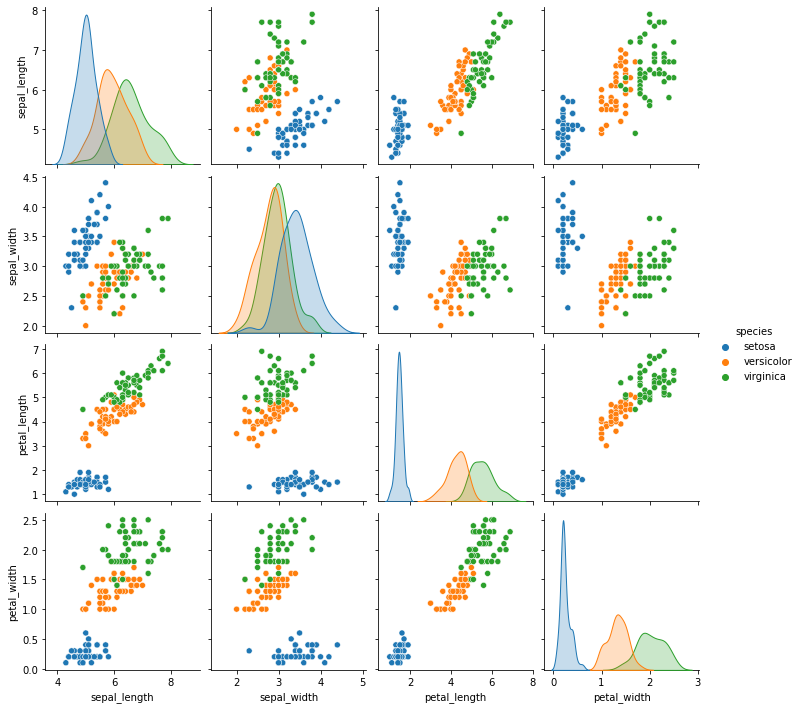

In [120]:
#I.4: Which features would be best used to predict species?
sns.pairplot(data = iris, hue = 'species')

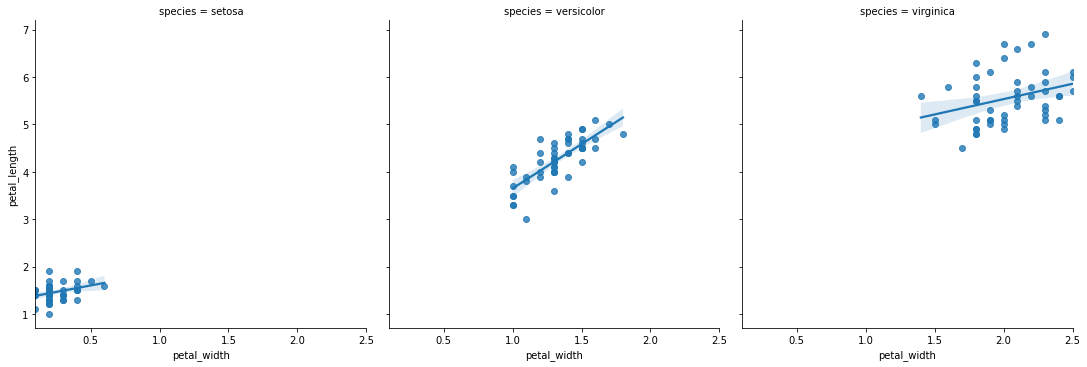

In [16]:
sns.lmplot(x = 'petal_width', 
           y = 'petal_length', 
           col = 'species', 
           data = iris)

# 1.
Using the lesson as an example, use seaborn's `load_dataset` function to load the `anscombe` data set. 


In [18]:
anscombe = sns.load_dataset('anscombe')

In [27]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [19]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


- Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?

In [20]:
anscombe.dataset.value_counts()

III    11
IV     11
II     11
I      11
Name: dataset, dtype: int64

In [22]:
anscombe.dataset.value_counts().describe()

count     4.0
mean     11.0
std       0.0
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: dataset, dtype: float64

In [25]:
anscombe.groupby('dataset')[['x', 'y']].agg(['mean', 'count', 'std', 'min', 'median', 'max'])

x                                           y                  \
        mean count       std  min median   max      mean count       std   
dataset                                                                    
I        9.0    11  3.316625  4.0    9.0  14.0  7.500909    11  2.031568   
II       9.0    11  3.316625  4.0    9.0  14.0  7.500909    11  2.031657   
III      9.0    11  3.316625  4.0    9.0  14.0  7.500000    11  2.030424   
IV       9.0    11  3.316625  8.0    8.0  19.0  7.500909    11  2.030579   

                             
          min median    max  
dataset                      
I        4.26   7.58  10.84  
II       3.10   8.14   9.26  
III      5.39   7.11  12.74  
IV       5.25   7.04  12.50

In [121]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

- Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

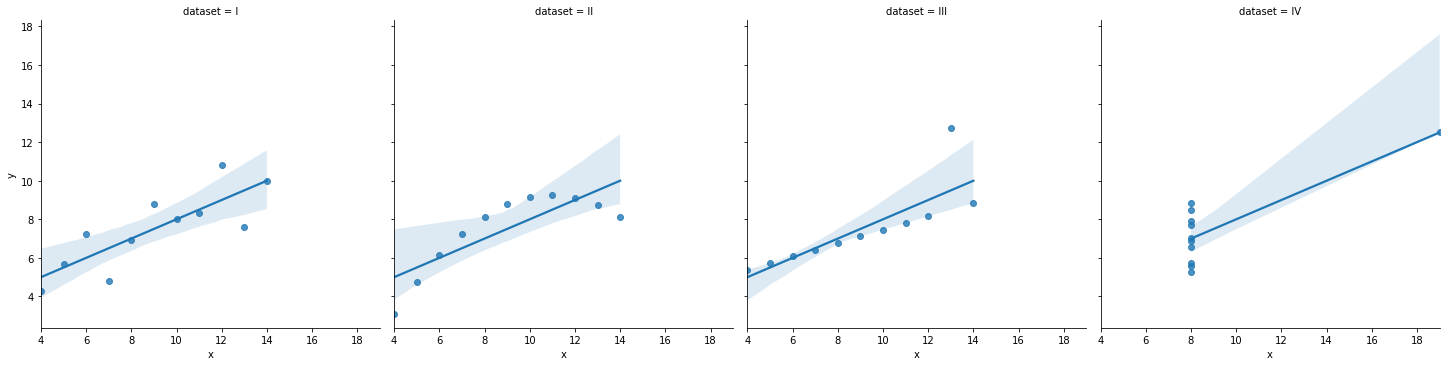

In [28]:
sns.lmplot(x = 'x', y = 'y', col = 'dataset', data = anscombe)

# 2. 
Load the `InsectSprays` dataset and read it's documentation. 

In [29]:
InsectSprays = data('InsectSprays')

In [30]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [31]:
InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


- Create a boxplot that shows the effectiveness of the different insect sprays.


In [32]:
InsectSprays.spray.value_counts()

C    12
F    12
D    12
B    12
E    12
A    12
Name: spray, dtype: int64

<AxesSubplot:xlabel='count', ylabel='spray'>

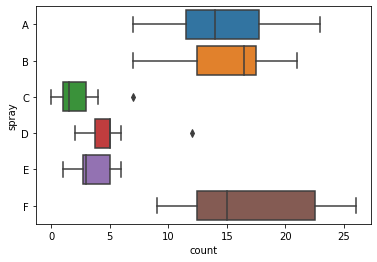

In [33]:
sns.boxplot(data = InsectSprays, x = 'count', y = 'spray')

# 3.
Load the `swiss` dataset and read it's documentation. 

In [35]:
swiss = data('swiss')

In [36]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [37]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [38]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


## Create visualizations to answer the following questions:

### 3.A:
Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [51]:
swiss['is_catholic'] = np.where(swiss.Catholic > 50, 'Catholic', 'Not Catholic')

#swiss['is_catholic'] = swiss.Catholic > 50

swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,Not Catholic
Delemont,83.1,45.1,6,9,84.84,22.2,Catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Catholic
Moutier,85.8,36.5,12,7,33.77,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,5.16,20.6,Not Catholic


### 3.B:
Does whether or not a province is Catholic influence fertility?

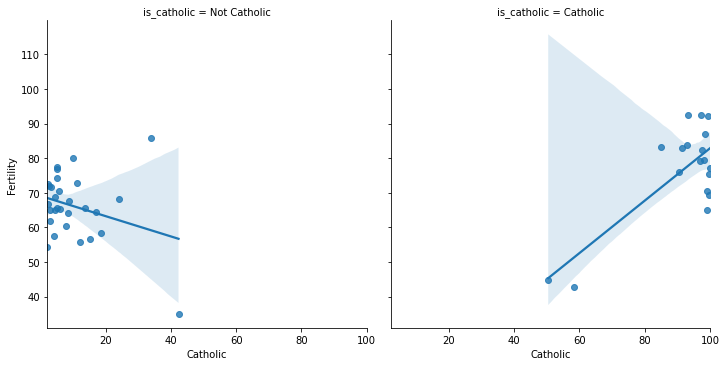

In [71]:
sns.lmplot(data = swiss, y = 'Fertility', x = 'Catholic', col = 'is_catholic')

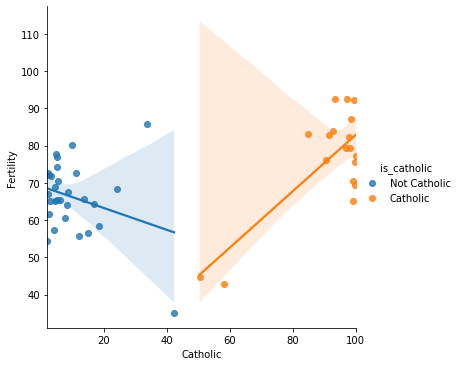

In [73]:
sns.lmplot(data = swiss, y = 'Fertility', x = 'Catholic', hue = 'is_catholic')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

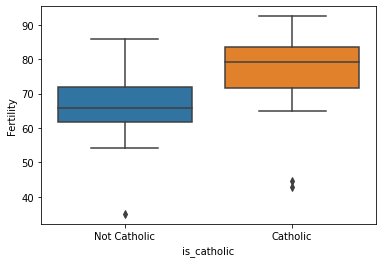

In [122]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

### 3.C:
What measure correlates most strongly with fertility?

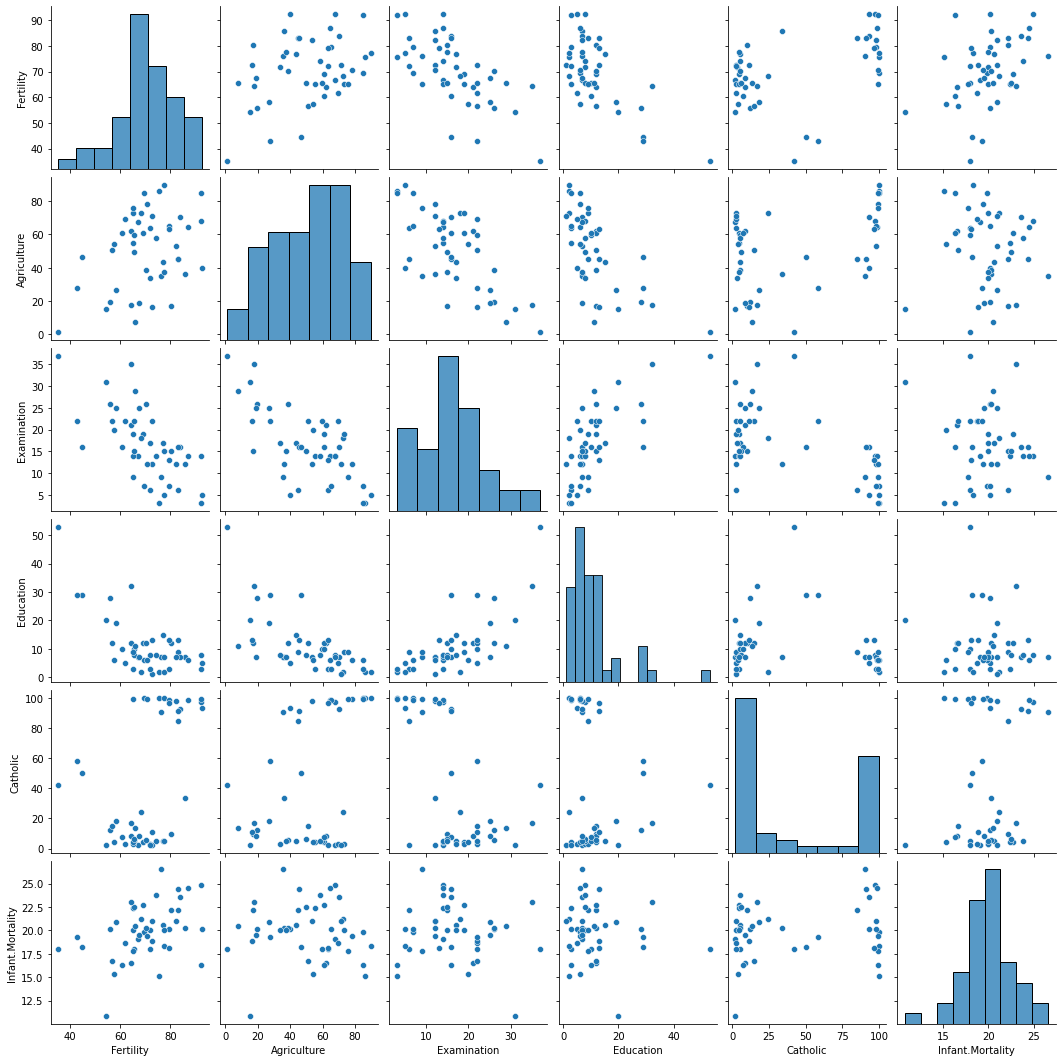

In [74]:
sns.pairplot(swiss)

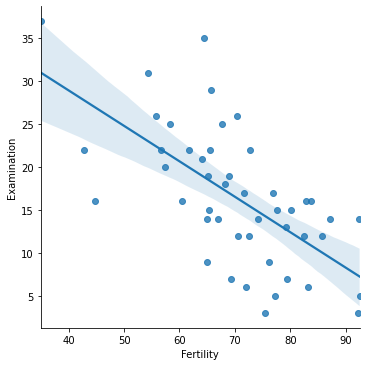

In [76]:
sns.lmplot(data = swiss, x = 'Fertility', y = 'Examination')

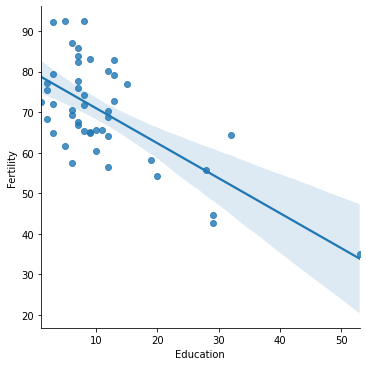

In [81]:
sns.lmplot(data = swiss, y = 'Fertility', x = 'Education')

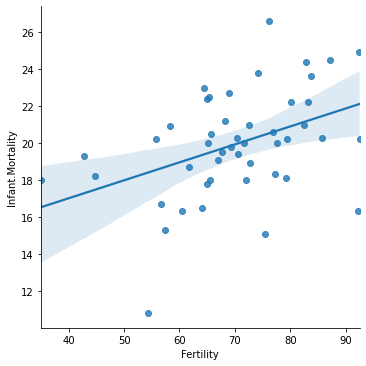

In [79]:
sns.lmplot(data = swiss, x = 'Fertility', y = 'Infant.Mortality')

In [123]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

# 4.
Using the `chipotle` dataset from the previous exercise...

In [82]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [83]:
sql = """
select*
from orders
"""

orders = pd.read_sql(sql, url)

In [124]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [93]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


### - create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [125]:
top_items = orders.groupby('item_name').quantity.sum().nlargest(4, keep='all')

top_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [126]:
top_items.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [131]:
top_sale = orders[orders.item_name.isin(top_items.index)].groupby('item_name').item_price.sum()
top_sale 

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [132]:
pop_revenue = pd.DataFrame(top_sale)
pop_revenue

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Chips and Guacamole,2201.04
Steak Burrito,3851.43


<AxesSubplot:xlabel='item_name', ylabel='item_price'>

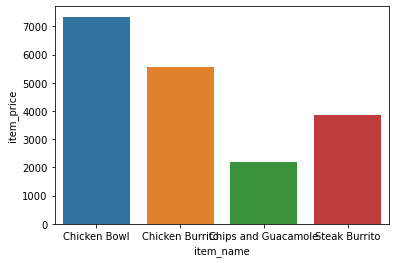

In [134]:
sns.barplot(data = pop_revenue, y = 'item_price', x = pop_revenue.index)

In [130]:
#top_item = orders.groupby('item_name').item_price.sum().nlargest(4, keep='all')
#
#top_item

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [128]:
#top_sales = pd.DataFrame(top_item)
#top_sales 

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

<AxesSubplot:xlabel='item_name', ylabel='item_price'>

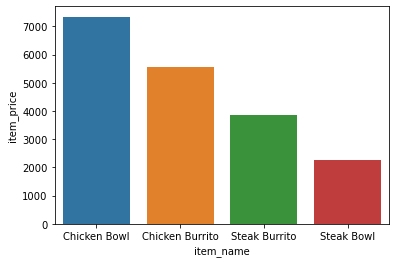

In [109]:
#sns.barplot(data = top_sales, y = 'item_price', x = top_sales.index)

# 5.
Load the `sleepstudy` data and read it's documentation. time.

In [110]:
sleepstudy = data('sleepstudy')

In [112]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [113]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


- Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction 

In [115]:
sleepstudy.Days.value_counts()

9    18
8    18
7    18
6    18
5    18
4    18
3    18
2    18
1    18
0    18
Name: Days, dtype: int64

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

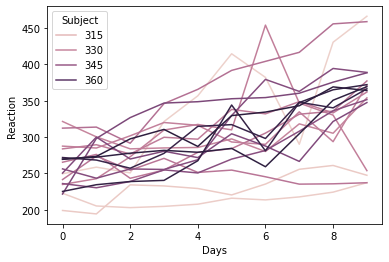

In [116]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')

In [137]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subj_' + sleepstudy.Subject.astype(str)

In [138]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subj_308
2,258.7047,1,Subj_308
3,250.8006,2,Subj_308
4,321.4398,3,Subj_308
5,356.8519,4,Subj_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

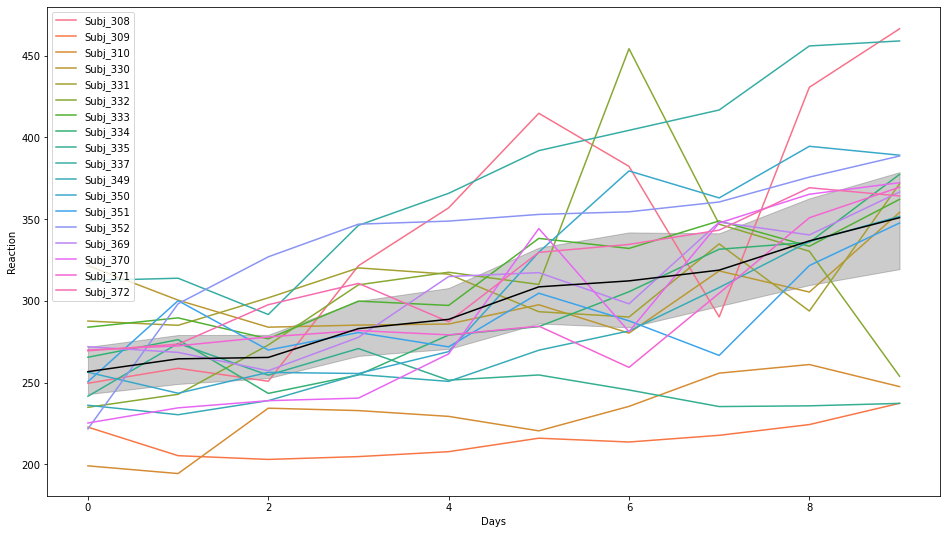

In [141]:

plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')

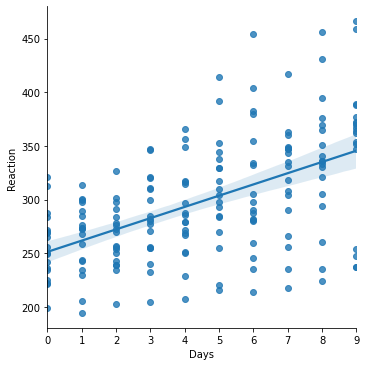

In [118]:
#sns.lmplot(data = sleepstudy, x = 'Days', y = 'Reaction')